In [89]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

In [90]:
def myLagrange(x_ar, y_ar):
    getcontext().prec = 50
    L = 0
    for j in range(len(x_ar)):
        product = 1
        for i in range(len(x_ar)):
            if i != j:
                product *= np.poly1d([1, -x_ar[i]]) / (x_ar[j] - x_ar[i])
        L += y_ar[j] * product
    return L

In [91]:
def s(x, y):
    h = [x[i + 1] - x[i] for i in range(len(x) - 1)]
    A = np.zeros((len(x), len(x)))
    A[0][0] = 1
    B = [[0]]
    for i in range(1, len(x) - 1):
        coef = [h[i - 1], 2*(h[i - 1] + h[i]), h[i]]
        i_coef = 0
        for j in range(i-1, i+2):
            A[i][j] = coef[i_coef]
            i_coef += 1
        B.append([(6*(y[i + 1] - y[i]) / h[i]) - (6*(y[i] - y[i - 1]) / h[i - 1])])
    A[-1][-1] = 1
    B.append([0])
    sol = np.linalg.solve(A, B)
    return sol, h

In [92]:
def spline(x, x_ar, y_ar):
    s_ar = s(x_ar, y_ar)
    si, h = s_ar[0], s_ar[1]
    i_pred = 0
    i_next = 0
    for i in range(1, len(x_ar)):
        if x >= x_ar[i- 1] and x <= x_ar[i]:
            i_pred = i - 1
            i_next = i
    return ((si[i_pred]*(x_ar[i_next] - x)**3) / (6*h[i_pred])) + ((si[i_next]*(x - x_ar[i_pred])**3) / (6*h[i_pred])) + ((y_ar[i_pred] / h[i_pred]) - ((si[i_pred] * h[i_pred]) / 6))*(x_ar[i_next] - x) + ((y_ar[i_next] / h[i_pred]) - ((si[i_next] * h[i_pred]) / 6))*(x - x_ar[i_pred])

In [93]:
X = []
Y = []
for line in open('kursach_input.txt').read().split('\n'):
    line = list(map(float, line.split()))
    X.append(line[0])
    Y.append(line[1])

3 точки

In [94]:
ro_min_L = float('inf')
l = 0
for i in range(1, len(X) - 1):
    su = sum([(myLagrange([X[0], X[i], X[-1]], [Y[0], Y[i], Y[-1]])(X[j]) - Y[j])**2 for j in range(1, len(X) - 1)])**(1/2)
    if su < ro_min_L:
        ro_min_L = su
        l = i

In [95]:
ro_min_S = float('inf')
k = 0
for i in range(1, len(X) - 1):
    su = sum([(spline(X[j], tuple([X[0], X[i], X[-1]]), tuple([Y[0], Y[i], Y[-1]])) - Y[j])**2 for j in range(1, len(X) - 1)])**(1/2)
    if su < ro_min_S:
        ro_min_S = su
        k = i

In [96]:
ro_min_S_L = sum([(spline(X[j], tuple([X[0], X[l], X[-1]]), tuple([Y[0], Y[l], Y[-1]])) - Y[j])**2 for j in range(1, len(X) - 1)])**(1/2)

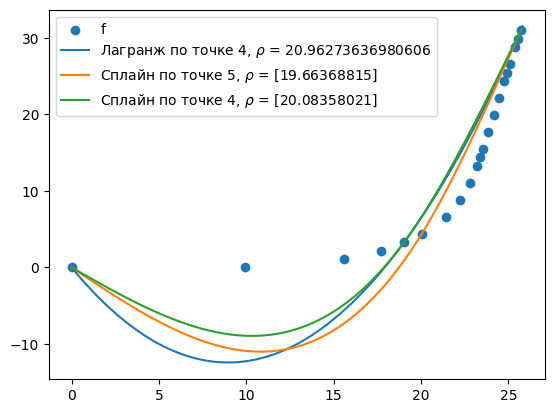

In [97]:
plt.scatter(X, Y)
plt.plot(np.arange(min(X), max(X) + 0.1, 0.1), [myLagrange([X[0], X[l], X[-1]], [Y[0], Y[l], Y[-1]])(x) for x in np.arange(min(X), max(X) + 0.1, 0.1)])
plt.plot(np.arange(min(X), max(X) + 0.01, 0.1), [spline(x, tuple([X[0], X[k], X[-1]]), tuple([Y[0], Y[k], Y[-1]])) for x in np.arange(min(X), max(X) + 0.01, 0.1)])
plt.plot(np.arange(min(X), max(X) + 0.01, 0.1), [spline(x, tuple([X[0], X[l], X[-1]]), tuple([Y[0], Y[l], Y[-1]])) for x in np.arange(min(X), max(X) + 0.01, 0.1)])
plt.legend(['f', rf'Лагранж по точке {l}, $\rho$ = {ro_min_L}', rf'Сплайн по точке {k}, $\rho$ = {ro_min_S}', rf'Сплайн по точке {l}, $\rho$ = {ro_min_S_L}'])

In [98]:
l

4

In [99]:
k

5

4 точки

In [100]:
ro_min_L = float('inf')
l1 = 0
l2 = 0
for i in range(1, len(X) - 1):
    for i2 in range(1, len(X) - 1):
        if i == i2:
            continue
        su = sum([(myLagrange([X[0], X[i], X[i2], X[-1]], [Y[0], Y[i], Y[i2], Y[-1]])(X[j]) - Y[j])**2 for j in range(1, len(X) - 1)])**(1/2)
        if su < ro_min_L:
            ro_min_L = su
            l1 = i
            l2 = i2

In [101]:
ro_min_S = float('inf')
k1 = 0
k2 = 0
for i in range(1, len(X) - 1):
    for i2 in range(1, len(X) - 1):
        if i2 <= i:
            continue
        su = sum([(spline(X[j], [X[0], X[i], X[i2], X[-1]], [Y[0], Y[i], Y[i2], Y[-1]]) - Y[j])**2 for j in range(1, len(X) - 1)])**(1/2)
        if su < ro_min_S:
            ro_min_S = su
            k1 = i
            k2 = i2

In [102]:
ro_min_S_L = sum([(spline(X[j], [X[0], X[l1], X[l2], X[-1]], [Y[0], Y[l1], Y[l2], Y[-1]]) - Y[j])**2 for j in range(1, len(X) - 1)])**(1/2)

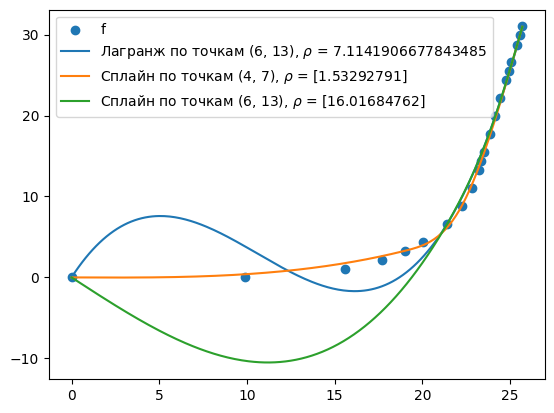

In [103]:
plt.scatter(X, Y)
plt.plot(np.arange(min(X), max(X) + 0.01, 0.1), [myLagrange([X[0], X[l1], X[l2], X[-1]], [Y[0], Y[l1], Y[l2], Y[-1]])(x) for x in np.arange(min(X), max(X) + 0.01, 0.1)])
plt.plot(np.arange(min(X), max(X) + 0.01, 0.1), [spline(x, tuple([X[0], X[k1], X[k2], X[-1]]), tuple([Y[0], Y[k1], Y[k2], Y[-1]])) for x in np.arange(min(X), max(X) + 0.01, 0.1)])
plt.plot(np.arange(min(X), max(X) + 0.01, 0.1), [spline(x, tuple([X[0], X[l1], X[l2], X[-1]]), tuple([Y[0], Y[l1], Y[l2], Y[-1]])) for x in np.arange(min(X), max(X) + 0.01, 0.1)])
plt.legend(['f', rf'Лагранж по точкам {l1, l2}, $\rho$ = {ro_min_L}', rf'Сплайн по точкам {k1, k2}, $\rho$ = {ro_min_S}', rf'Сплайн по точкам {l1, l2}, $\rho$ = {ro_min_S_L}'])

In [104]:
l1, l2

(6, 13)

In [105]:
k1, k2

(4, 7)

5 точек

In [106]:
ro_min_L = float('inf')
l1 = 0
l2 = 0
l3 = 0
for i in range(1, len(X) - 1):
    for i2 in range(1, len(X) - 1):
        for i3 in range(1, len(X) - 1):
            if i == i2 or i == i3 or i2 == i3:
                continue
            su = sum([(myLagrange([X[0], X[i], X[i2], X[i3], X[-1]], [Y[0], Y[i], Y[i2], Y[i3], Y[-1]])(X[j]) - Y[j])**2 for j in range(1, len(X) - 1)])**(1/2)
            if su < ro_min_L:
                ro_min_L = su
                l1 = i
                l2 = i2
                l3 = i3

In [107]:
ro_min_S = float('inf')
k1 = 0
k2 = 0
k3 = 0
for i in range(1, len(X) - 1):
    for i2 in range(1, len(X) - 1):
        for i3 in range(1, len(X) - 1):
            if i >= i2 or i >= i3 or i2 >= i3:
                continue
            su = sum([(spline(X[j], tuple([X[0], X[i], X[i2], X[i3], X[-1]]), tuple([Y[0], Y[i], Y[i2], Y[i3], Y[-1]])) - Y[j])**2 for j in range(1, len(X) - 1)])**(1/2)
            if su < ro_min_S:
                ro_min_S = su
                k1 = i
                k2 = i2
                k3 = i3

In [108]:
ro_min_S_L = sum([(spline(X[j], tuple([X[0], X[l1], X[l2], X[l3], X[-1]]), tuple([Y[0], Y[l1], Y[l2], Y[l3], Y[-1]])) - Y[j])**2 for j in range(1, len(X) - 1)])**(1/2)

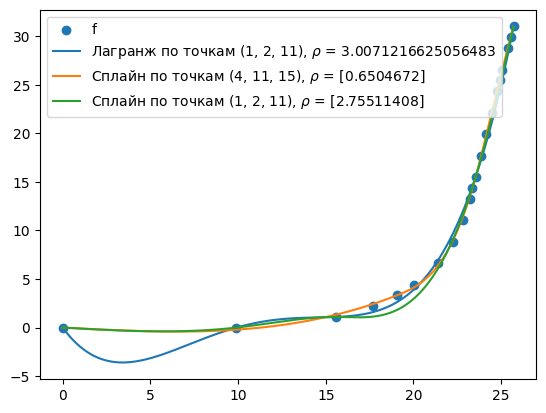

In [109]:
plt.scatter(X, Y)
X1 = list(map(Decimal, X))
Y1 = list(map(Decimal, Y))
plt.plot(np.arange(min(X1), max(X1) + Decimal(0.01), Decimal(0.1)), [myLagrange([X1[0], X1[l1], X1[l2], X1[l3], X1[-1]], [Y1[0], Y1[l1], Y1[l2], Y1[l3], Y1[-1]])(x) for x in np.arange(min(X1), max(X1) + Decimal(0.01), Decimal(0.1))])
plt.plot(np.arange(min(X), max(X) + 0.01, 0.1), [spline(x, tuple([X[0], X[k1], X[k2], X[k3], X[-1]]), tuple([Y[0], Y[k1], Y[k2], Y[k3], Y[-1]])) for x in np.arange(min(X), max(X) + 0.01, 0.1)])
plt.plot(np.arange(min(X), max(X) + 0.01, 0.1), [spline(x, tuple([X[0], X[l1], X[l2], X[l3], X[-1]]), tuple([Y[0], Y[l1], Y[l2], Y[l3], Y[-1]])) for x in np.arange(min(X), max(X) + 0.01, 0.1)])
plt.legend(['f', rf'Лагранж по точкам {l1, l2, l3}, $\rho$ = {ro_min_L}', rf'Сплайн по точкам {k1, k2, k3}, $\rho$ = {ro_min_S}', rf'Сплайн по точкам {l1, l2, l3}, $\rho$ = {ro_min_S_L}'])

In [110]:
l1, l2, l3

(1, 2, 11)

In [111]:
k1, k2, k3

(4, 11, 15)

# все точки

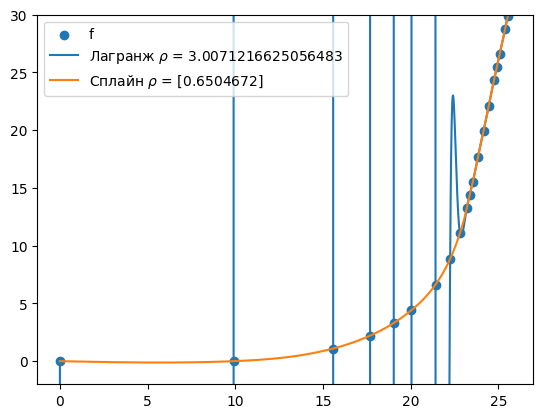

In [112]:
ax = plt.gca()
ax.set_ylim([-2, 30])
plt.scatter(X, Y)
plt.plot(np.arange(min(X1), max(X1) + Decimal(0.01), Decimal(0.01)), [myLagrange(X1, Y1)(x) for x in np.arange(min(X1), max(X1) + Decimal(0.01), Decimal(0.01))])
plt.plot(np.arange(min(X), max(X) + 0.01, 0.1), [spline(x, tuple(X), tuple(Y)) for x in np.arange(min(X), max(X) + 0.01, 0.1)])
plt.legend(['f', rf'Лагранж $\rho$ = {ro_min_L}', rf'Сплайн $\rho$ = {ro_min_S}'])